# Importing and installing required libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# GPU information

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed May 31 11:53:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mounting the google drive

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Setting the path to current folder in google drive

In [4]:
%cd /content/gdrive/My\Drive/Assignment_5

/content/gdrive/MyDrive/Assignment_5


# Importing modules from utils.py and model.py files

In [5]:
from utils import download_data,create_plot,create_accuracy_loss_plot,generate_model_parameters
from model import Net

# Creating train and test dataloader

In [6]:
train_loader,test_loader=download_data({'batch_size': 512, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}).create_loader()

# Setting the gpu

In [7]:
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# This line is added to make sure the device name is set as cuda

# Creating image and labels plot

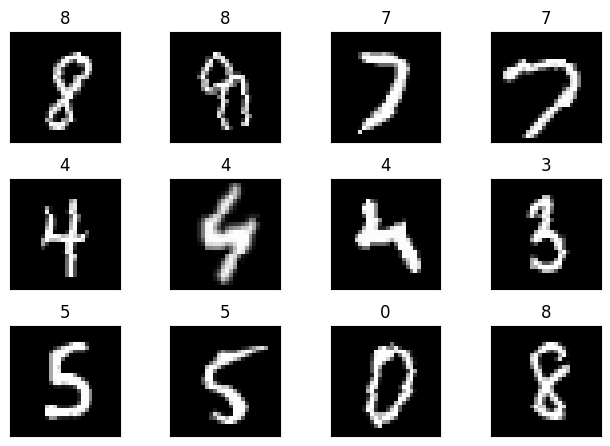

In [8]:
create_plot(train_loader).plot_image_labels()

# Training the model

In [9]:

train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

from tqdm import tqdm

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

def train(model, device, train_loader, optimizer):
  model.train()
  pbar = tqdm(train_loader)

  train_loss = 0
  correct = 0
  processed = 0

  for batch_idx, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()

    # Predict
    pred = model(data)
    # print("pred",pred)
    # print("target",target)

    # Calculate loss
    loss = F.nll_loss(pred, target)
    train_loss+=loss.item()

    # Backpropagation
    loss.backward()
    optimizer.step()
    
    correct += GetCorrectPredCount(pred, target)
    processed += len(data)

    pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

  train_acc.append(100*correct/processed)
  train_losses.append(train_loss/len(train_loader))

def test(model, device, test_loader):
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)

            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss

            correct += GetCorrectPredCount(output, target)


    test_loss /= len(test_loader.dataset)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1.00e-03, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer)
  test(model, device, test_loader)
  scheduler.step()
     

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=2.2922 Batch_id=117 Accuracy=13.91: 100%|██████████| 118/118 [00:30<00:00,  3.88it/s]


Test set: Average loss: 2.2901, Accuracy: 2128/10000 (21.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=2.2213 Batch_id=117 Accuracy=31.33: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 2.2200, Accuracy: 4881/10000 (48.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=0.8445 Batch_id=117 Accuracy=60.86: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.5929, Accuracy: 8185/10000 (81.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.3815 Batch_id=117 Accuracy=82.72: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.3721, Accuracy: 8902/10000 (89.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.3696 Batch_id=117 Accuracy=86.82: 100%|██████████| 118/118 [00:24<00:00,  4.91it/s]


Test set: Average loss: 0.2966, Accuracy: 9116/10000 (91.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.4182 Batch_id=117 Accuracy=88.80: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 0.2433, Accuracy: 9256/10000 (92.56%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.3927 Batch_id=117 Accuracy=91.05: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.1879, Accuracy: 9478/10000 (94.78%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.1874 Batch_id=117 Accuracy=92.45: 100%|██████████| 118/118 [00:23<00:00,  4.92it/s]


Test set: Average loss: 0.1579, Accuracy: 9541/10000 (95.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0958 Batch_id=117 Accuracy=93.55: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.1504, Accuracy: 9544/10000 (95.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.1440 Batch_id=117 Accuracy=94.46: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.1284, Accuracy: 9602/10000 (96.02%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1703 Batch_id=117 Accuracy=94.83: 100%|██████████| 118/118 [00:23<00:00,  4.98it/s]


Test set: Average loss: 0.1008, Accuracy: 9703/10000 (97.03%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.1363 Batch_id=117 Accuracy=95.58: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0893, Accuracy: 9732/10000 (97.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.1829 Batch_id=117 Accuracy=95.66: 100%|██████████| 118/118 [00:23<00:00,  5.00it/s]


Test set: Average loss: 0.0807, Accuracy: 9763/10000 (97.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.1770 Batch_id=117 Accuracy=96.11: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0759, Accuracy: 9763/10000 (97.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0899 Batch_id=117 Accuracy=96.16: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0780, Accuracy: 9750/10000 (97.50%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.1027 Batch_id=117 Accuracy=96.73: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0678, Accuracy: 9790/10000 (97.90%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.1389 Batch_id=117 Accuracy=96.77: 100%|██████████| 118/118 [00:24<00:00,  4.78it/s]


Test set: Average loss: 0.0680, Accuracy: 9794/10000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.1614 Batch_id=117 Accuracy=96.78: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 0.0665, Accuracy: 9801/10000 (98.01%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.2540 Batch_id=117 Accuracy=96.86: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0660, Accuracy: 9798/10000 (97.98%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


Train: Loss=0.0559 Batch_id=117 Accuracy=96.80: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0658, Accuracy: 9799/10000 (97.99%)

Adjusting learning rate of group 0 to 1.0000e-04.


# Creating accuracy and loss plots

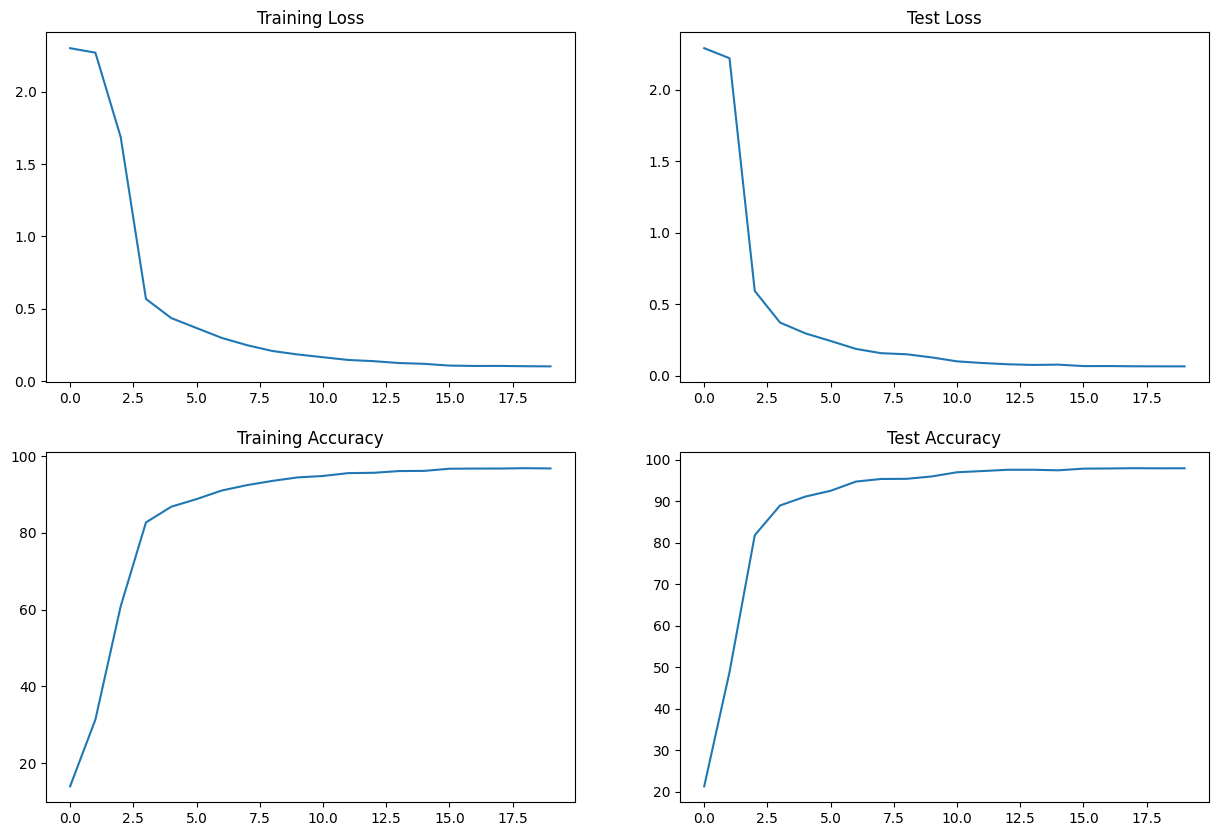

In [10]:
create_accuracy_loss_plot(train_losses,train_acc,test_losses,test_acc).plot_accuray_loss()

# Print model architecture and parameters

In [11]:
generate_model_parameters(28).generate_params(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
